In [68]:
import scipy
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [69]:
def pontoFixo(funcao, xi, stop):
    return opt.fixed_point(funcao, xi, maxiter=200, xtol = stop)

In [70]:
def newtonRapson(f1, f2, xi, maxit):
    return opt.root_scalar(f1, fprime=f2, x0=xi, method='newton', maxiter=maxit)

In [71]:
def bissec(f, xl, xu, stop):
    return opt.root_scalar(f,method='bisect',bracket=[xl,xu], rtol = stop, maxiter=200)

In [72]:
def falsaPosicao(f, xl, xu, stop ):
    
    it = 0
    
    while(1):
        
        xr = xu - ( f(xu)*(xl - xu)/ (f(xl) - f(xu)) )
        erro = abs( (xr-xu)/xr*100 )
        it += 1
        
        if erro <= stop or it == 200:
            break
        
        if (f(xl) * f(xr)) > 0:
            
            xl = xr

        else: 
            xu = xr
            
        
    return xr, it

**6.1**

In [73]:
def f(x):
    return np.sin(np.sqrt(x)) - x

In [74]:
pontoFixo(f, 0.5, 0.01)

array(0.23130901)

**6.2**

In [75]:
def g(x):
    return -0.9*x**2 + 1.7*x + 2.5

In [76]:
pontoFixo(g, 0.5, 0.01)

array(2.10025783)

**6.11**

In [77]:
def k1(x):
    return np.tanh(x**2-9)

k1(3)

0.0

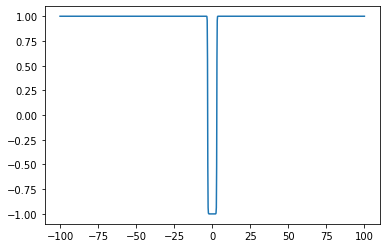

In [78]:
x = np.linspace(-100, 100, 1000)
plt.plot(x, k1(x))

In [79]:
from __future__ import division
import sympy as sy
x, y = sy.symbols('x y') #define x e y como variáveis simbólicas.

def S(x):
    return sy.tanh(x**2-9)


In [80]:
sy.diff(S(x),x)

2*x*(1 - tanh(x**2 - 9)**2)

In [81]:
# derivada de k1

def k2(x): 
    return 2*x*(1 - (np.tanh(x**2-9))**2)
    

In [82]:
newtonRapson(k1, k2, 3.2, 3)

      converged: False
           flag: 'convergence error'
 function_calls: 6
     iterations: 3
           root: -256.41329077032356

**6.16**

In [83]:
def volume(h):
    r = 2
    L = 5
    V = 8
    return (r**2*(1/np.cos(r-h/r) - (r-h)*np.sqrt(2*r*h-h**2)) )*L

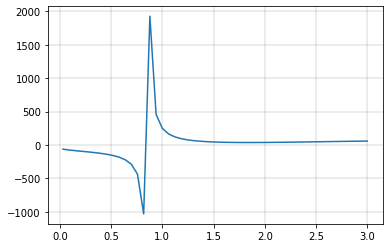

In [90]:
h = np.linspace(-3, 3, 100)
plt.plot(h, volume(h)) 
plt.grid(color='gray', linestyle='-', linewidth=0.3)